# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Giovanny Halimko]
- **Email:** [giovannyhalimko@gmail.com]
- **ID Dicoding:** [giovannyhalimko]

## Menentukan Pertanyaan Bisnis

- Bagaimana kategori produk yang paling sering dibeli dan wilayah mana yang menghasilkan penjualan tertinggi dalam 12 bulan terakhir?
    1. Spesifik & Terkait Dataset: Fokus pada kategori produk dan wilayah (dapat diambil dari tabel products, order_items, dan geolocation).
    2. Terukur: Berdasarkan jumlah penjualan dalam 12 bulan terakhir.
    3. Aksi: Hasilnya dapat digunakan untuk optimalisasi pemasaran dan distribusi.
    4. Time-bound: Terfokus pada 12 bulan terakhir.
    
- Apa faktor yang paling mempengaruhi rating ulasan pelanggan (positif dan negatif) dalam 6 bulan terakhir?
    1. Spesifik & Terkait Dataset: Fokus pada ulasan dari tabel order_reviews dan informasi lain seperti waktu pengiriman atau kategori produk.
    2. Terukur: Berfokus pada ulasan dengan rating tertinggi (>4) dan terendah (<3).
    3. Aksi: Dapat digunakan untuk memperbaiki kualitas layanan pelanggan atau waktu pengiriman.
    4. Time-bound: Hanya ulasan dalam 6 bulan terakhir.

- Bagaimana pengaruh waktu pengiriman terhadap tingkat kepuasan pelanggan ?
    1. Spesifik & Terkait Dataset: Fokus pada waktu pengiriman (data dari order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date dan order_purchase_timestamp di tabel orders) dan rating ulasan (dari order_reviews).
    2. Terukur: Bandingkan durasi pengiriman dengan rating ulasan untuk melihat korelasinya.
    3. Aksi: Dapat digunakan untuk memperbaiki waktu pengiriman dan meningkatkan kepuasan pelanggan.
    4. Time-bound: Analisis bisa dilakukan untuk periode 6 atau 12 bulan terakhir maupun secara keseluruhan.

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
customer_df = pd.read_csv('data/customers_dataset.csv')
order_df = pd.read_csv('data/orders_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- Pada bagian ini dilakukan proses pengumpulan data, dimana data diload ke dalam memori menggunakan panda dengan membaca file CSV yang terdapat didalam dataset.

### Assessing Data

Pada bagian dibawah akan dilakukan pengecekan terhadap missing value.

In [6]:
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [10]:
product_category_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [11]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [12]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [13]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- Dapat dilihat pada dataframe customer tidak terdapat missing value.
- Pada dataframe order terdapat missing value pada kolom order_approve_at, order_delivered_customer_date, order_estimated_delivery_date.
- Pada datafram order_items tidak terdapat missing value.
- Pada dataframe product terdapat beberapa data yang memiliki missing value yakni sebanyak 610 data yang memiliki missing value pada kolom: product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty.
- Terdapat juga 2 record data yang memiliki missing value apda kolom product_weight_g, product_length_cm, product_height_cm dan product_width_cm
- Dapat dilihat juga terdapat nama kolom yang typo, nantinya akan kita perbaiki pada proses cleaning data.
- Pada dataframe product_category tidak terdapat missing value.
- Pada order_review datafram terdapat missing value pada kolom review_comment_title dan review_comment_message.
- Atribut ini tidak diperlukan untuk menjawab pertanyaan- pertanyaan yang telah didefinisikan diatas, maka record data tidak perlu kita drop nantinya.
- Atribut ini bersifat free text string yang mungkin akan lebih berguna jika dianalisa menggunakan LLM (Large Language Model) dalam ranah NLP (Natural Language Processing)
- Pada order_payments dataframe tidak terdapat missing value.
- Pada geolocation dataframe tidak terdapat missing value.
- Pada sellers dataframe tidak terdapat missing value

Pada bagian dibawah ini akan dilakukan pengecekan terhadap data duplikat.

In [26]:
customer_df.duplicated().sum()

0

In [16]:
order_df.duplicated().sum()

0

In [17]:
order_items_df.duplicated().sum()

0

In [18]:
products_df.duplicated().sum()

0

In [19]:
product_category_df.duplicated().sum()

0

In [20]:
order_reviews_df.duplicated().sum()

0

In [21]:
order_payments_df.duplicated().sum()

0

In [22]:
geolocation_df.duplicated().sum()

261831

In [23]:
sellers_df.duplicated().sum()

0

**Insight:**
- Dapat dilihat pada seluruh datafram tidak terdapat duplicate values kecuali pada datafram geolocation.

### Cleaning Data

In [27]:
order_df.dropna(axis=0, inplace=True)
products_df.dropna(axis=0, inplace=True)

**Insight:**
- Melakukan drop terhadap missing value pada dataframe yang diperlukan , pada kasus ini hanya pada dataframe order dan product, karena sebagian besar tidak memiliki missing value sedangkan pada order_review tidak perlu kita drop, karena missing value terjadi pada kolom yang tidak akan digunakan dalam proses analisis ini, namun kolom seperti score rating diperlukan , maka akan sangat disayangkan jika membuang informasi tersebut.

In [28]:
geolocation_df.drop_duplicates()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


**Insight:**
- Pada process assessing data ditemukan dataframe geolocation memiliki duplicate values , maka dari itu diperlukan proses untuk menghapus nilai duplikat yang tidak diperlukan.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1:

In [ ]:
# Convert 'order_purchase_timestamp' to datetime
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

# Find the maximum date in 'order_purchase_timestamp'
question_one_max_date = order_df['order_purchase_timestamp'].max()

# Calculate the date 12 months before the maximum date
question_one_start_date = question_one_max_date - pd.DateOffset(months=12)

# Filter orders to only include those from the last 12 months
question_one_filtered_orders = order_df[(order_df['order_purchase_timestamp'] >= question_one_start_date) & 
                           (order_df['order_purchase_timestamp'] <= question_one_max_date)]

**Insight:**
- Karena pertanyaan pertama memiliki keterikatan terhadap waktu yakni (time-bound) , maka perlu dilakukan penyesuai terhadap proses melakukan analisis, kita tidak dapat menggunakan acuan waktu 12 bulan terakhir berdasarkan tanggal sekarang dikarenakan record data pada dataset kebayakan berada pada rentang tahun 2017 - 2018
- maka dari itu kita akan menggunakan waktu paling dekat dengan waktu sekarang berdasarkan terjadi nya transaksi pembelian terhadap pesana.
- data tersebut dapat diperoleh melalui atribut 'order_puchase_timestamp' pada file data order.

In [ ]:
# Merge orders with customers to get location (state) info
question_one_order_customer_df = pd.merge(question_one_filtered_orders, customer_df, on='customer_id', how='inner')

# Merge with order_items, products, and product categories
question_one_merged_df = pd.merge(question_one_order_customer_df, order_items_df, on='order_id', how='inner')
question_one_merged_df = pd.merge(question_one_merged_df, products_df, on='product_id', how='inner')
question_one_merged_df = pd.merge(question_one_merged_df, product_category_df, on='product_category_name', how='inner')

# Group by product category and state to get total sales
question_one_category_sales_by_state = question_one_merged_df.groupby(['product_category_name_english', 'customer_state', 'customer_city']).agg({'order_id': 'count'}).reset_index()

# Rename columns for better readability
question_one_category_sales_by_state.columns = ['Product Category', 'State', 'City', 'Total Sales']

**Insight:**
- Setelah berhasil melakukan filter terhadap order yang terjadi 12 bulan terakhir dengan acuan waktu pembelian terakhir pada dataset, maka kita dapat menggabungkan dataframe order dengan dataframe lain nyaa, seperti product dan product category, sehingga kita dapat kemudian menjawab pertanyaan pertama.
- Proses cleaning data secara otomatis terjadi ketika kita melakukan proses joining dengan strategi innerjoin dimana data yang tidak memiliki relasi ataupun null relation akan tereliminasi dengan sendirinya.
- Kita jua melakukan renaming terhadap beberapa nama kolom agar dapat lebih mudah dipahami ketika dibaca.

In [10]:
# Get the top-selling product categories
question_one_top_product_categories = question_one_category_sales_by_state.groupby('Product Category').agg({'Total Sales': 'sum'}).sort_values(by='Total Sales', ascending=False).head(5)

# Get the top-selling states
question_one_top_states = question_one_category_sales_by_state.groupby('State').agg({'Total Sales': 'sum'}).sort_values(by='Total Sales', ascending=False).head(5)

# Get the top-selling city
question_one_top_city = question_one_category_sales_by_state.groupby('City').agg({'Total Sales': 'sum'}).sort_values(by='Total Sales', ascending=False).head(5)

# Display the results
print("Top 5 Product Categories with the Most Sales in the Last 12 Months:")
print(question_one_top_product_categories)

print("\nTop 5 States with the Most Sales in the Last 12 Months:")
print(question_one_top_states)

print("\nTop 5 City with the Most Sales in the Last 12 Months:")
print(question_one_top_city)

Top 5 Product Categories with the Most Sales in the Last 12 Months:
                       Total Sales
Product Category                  
bed_bath_table                7679
health_beauty                 7177
sports_leisure                5837
computers_accessories         5670
furniture_decor               5488

Top 5 States with the Most Sales in the Last 12 Months:
       Total Sales
State             
SP           33940
RJ            9787
MG            9014
RS            4063
PR            3954

Top 5 City with the Most Sales in the Last 12 Months:
                Total Sales
City                       
sao paulo             12890
rio de janeiro         5219
belo horizonte         2253
brasilia               1714
curitiba               1268


**Insight:**
- Untuk menjawab pertanyaan pertama maka diperlukan data total penjualan menggunakan 3 buah variable yakni: kategori produk, provinsi (State) , dan kota (City)
- Ingin diketahui penjualan tertinggi terdapat pada kategori produk apa dan diliwayah mana dalam 12 bulan terakhir, maka dilakukan proses agregasi untuk dapat menarik insight guna menjawab pertanyaan, pada bagian ini kita ingin melihat Top 5 (lima produk kategori dengan penjualan tertinggi dalam 12 bulan terakhir) dan Top 5 (lima wilayah dan kota dengan penjualan tertinggi dalam 12 bulan terakhir)

### Pertanyaan 2:

In [34]:
# Step 1: Merge nessecery dataframe to be able to be used to answer question two
question_two_merged_df = pd.merge(order_df, order_reviews_df, on='order_id', how='inner')
question_two_merged_df = pd.merge(question_two_merged_df, order_items_df, on='order_id', how='inner')
question_two_merged_df = pd.merge(question_two_merged_df, products_df, on='product_id', how='inner')
question_two_merged_df = pd.merge(question_two_merged_df, order_payments_df, on='order_id', how='inner')
question_two_merged_df = pd.merge(question_two_merged_df, product_category_df, on='product_category_name', how='inner')

# Filter data for the last 6 months from the latest purchase date
question_two_merged_df['order_purchase_timestamp'] = pd.to_datetime(question_two_merged_df['order_purchase_timestamp'])
question_two_latest_date = question_two_merged_df['order_purchase_timestamp'].max()
question_two_six_months_ago = question_two_latest_date - pd.DateOffset(months=6)
question_two_merged_df_last_6_months = question_two_merged_df[question_two_merged_df['order_purchase_timestamp'] >= question_two_six_months_ago]

# Asumsikan question_two_merged_df sudah memuat semua data yang diperlukan
question_two_merged_df['review_creation_date'] = pd.to_datetime(question_two_merged_df['review_creation_date'])

# Tentukan tanggal terbesar dalam dataset
question_two_latest_review_date = question_two_merged_df['review_creation_date'].max()

# Ambil data ulasan untuk 6 bulan terakhir
question_two_start_review_date = question_two_latest_review_date - pd.DateOffset(months=6)
question_two_last_6_months_reviews = question_two_merged_df[question_two_merged_df['review_creation_date'] >= question_two_start_review_date]

# Tambahkan informasi waktu pengiriman (delivery_time = waktu pengiriman dari order_approved ke delivered)
question_two_last_6_months_reviews['delivery_time'] = (pd.to_datetime(question_two_last_6_months_reviews['order_delivered_customer_date']) - 
                                          pd.to_datetime(question_two_last_6_months_reviews['order_approved_at'])).dt.days

# Filter data untuk rating tertinggi (>4) dan terendah (<3)
question_two_positive_reviews = question_two_last_6_months_reviews[question_two_last_6_months_reviews['review_score'] > 4]
question_two_negative_reviews = question_two_last_6_months_reviews[question_two_last_6_months_reviews['review_score'] < 3]

# Filter kolom yang relevan: 'review_score', 'product_category_name', 'product_category_name_english', 'delivery_time'
question_two_review_data = question_two_last_6_months_reviews[['review_score', 'product_category_name', 'product_category_name_english', 'delivery_time']]

# Analisis distribusi rating berdasarkan kategori produk
question_two_category_rating = question_two_review_data.groupby('product_category_name_english')['review_score'].mean().reset_index()
print(question_two_category_rating.sort_values(by='review_score', ascending=False))

# Analisis waktu pengiriman untuk ulasan positif dan negatif
question_two_positive_delivery = question_two_positive_reviews['delivery_time'].mean()
question_two_negative_delivery = question_two_negative_reviews['delivery_time'].mean()

print("\n")
print(f"Waktu pengiriman rata-rata untuk ulasan positif (>4): {question_two_positive_delivery} hari")
print(f"Waktu pengiriman rata-rata untuk ulasan negatif (<3): {question_two_negative_delivery} hari")

        product_category_name_english  review_score
29          fashion_childrens_clothes      5.000000
11                  cds_dvds_musicals      5.000000
9                      books_imported      4.702703
22            costruction_tools_tools      4.588235
30              fashion_male_clothing      4.578947
..                                ...           ...
34                    fixed_telephony      3.586207
57                   office_furniture      3.456094
41  furniture_mattress_and_upholstery      3.111111
46                     home_comfort_2      2.200000
52                         la_cuisine      2.000000

[70 rows x 2 columns]


Waktu pengiriman rata-rata untuk ulasan positif (>4): 8.860074818958712 hari
Waktu pengiriman rata-rata untuk ulasan negatif (<3): 18.044371612252615 hari


**Insight:**
- Dapat dilihat korelasi positif antara waktu pengiriman terhadap rating dari customer , dimana rating yang tinggi dalam kasus ini > 4 memiliki rata-rata waktu pengiriman 8.8 hari atau lebih kurang 9 hari.
- Untuk yang memiliki rating lebih rendah biasanya memiliki rata rata waktu pengiriman mencapai 18 hari.
- kategori produk juga mempengaruhi rating dari customer, seperti produk fashion cenderung mendapatkan rating lebih tinggi, sedangkan elektronik dan perabotan rumah tangga dan alat masak cenderung mendapatkan rating lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Visualisasi Top 5 Kategori Produk Terlaris

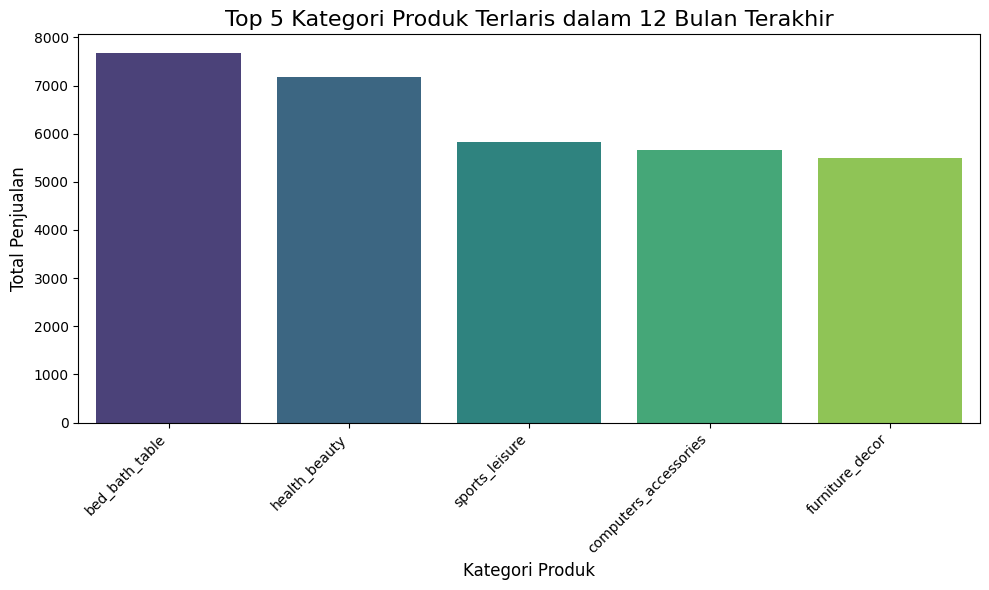

In [15]:
# Visualisasi Top 5 Kategori Produk Terlaris
plt.figure(figsize=(10, 6))
sns.barplot(x=question_one_top_product_categories.index, y=question_one_top_product_categories['Total Sales'], palette='viridis')
plt.title('Top 5 Kategori Produk Terlaris dalam 12 Bulan Terakhir', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualisasi Top 5 Wilayah dengan Penjualan Tertinggi

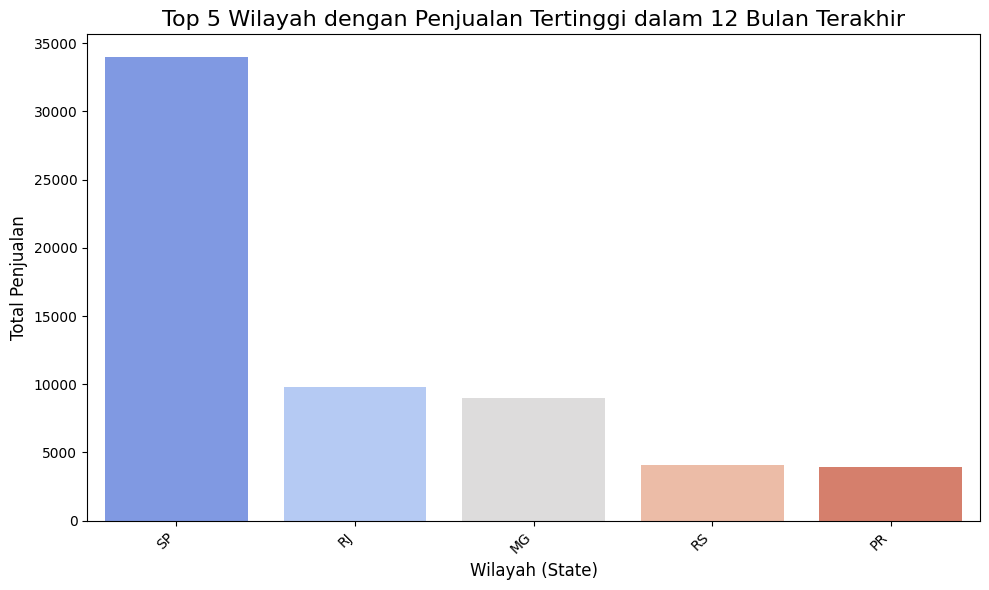

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=question_one_top_states.index, y=question_one_top_states['Total Sales'], palette='coolwarm')
plt.title('Top 5 Wilayah dengan Penjualan Tertinggi dalam 12 Bulan Terakhir', fontsize=16)
plt.xlabel('Wilayah (State)', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

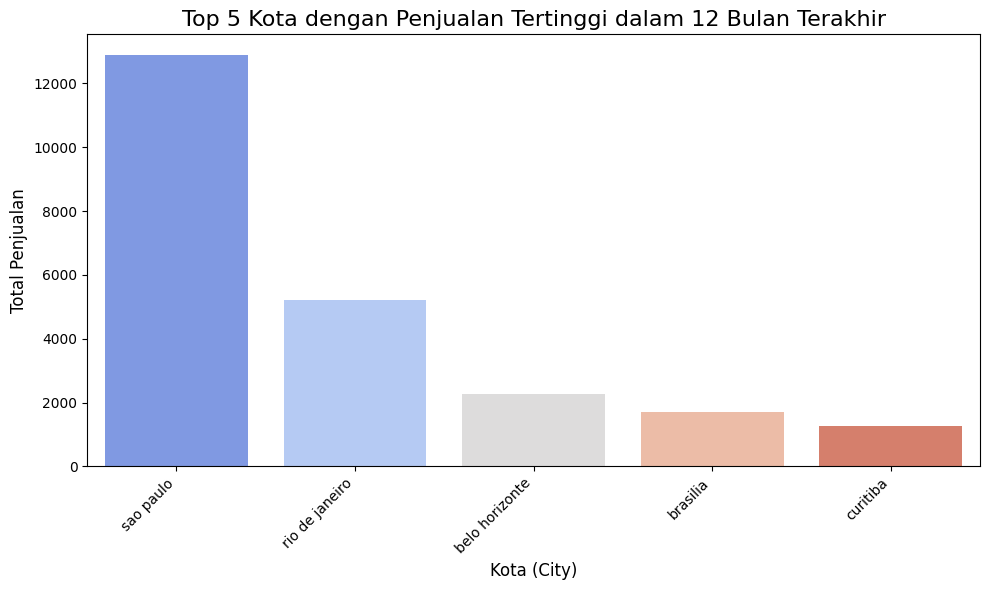

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=question_one_top_city.index, y=question_one_top_city['Total Sales'], palette='coolwarm')
plt.title('Top 5 Kota dengan Penjualan Tertinggi dalam 12 Bulan Terakhir', fontsize=16)
plt.xlabel('Kota (City)', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

- Berdasarkan hasil visualisasi pertama terkait kategori produk.

Kategori Produk Terlaris: "Bed_Bath_Table":
"Bed_Bath_Table" merupakan kategori dengan jumlah penjualan tertinggi, mendekati 8.000 penjualan. Ini menunjukkan bahwa produk-produk yang terkait dengan kebutuhan rumah tangga (seperti perlengkapan tidur, kamar mandi, dan meja) sangat diminati dalam 12 bulan terakhir.
Bisnis e-commerce dapat mempertimbangkan untuk meningkatkan stok dan variasi produk dalam kategori ini untuk memenuhi permintaan yang tinggi.

Kategori Kesehatan dan Kecantikan ("Health_Beauty"):
Kategori "Health_Beauty" berada di posisi kedua dengan penjualan mendekati 7.000. Hal ini menunjukkan permintaan yang kuat untuk produk kesehatan dan kecantikan, terutama di masa yang mungkin terkait dengan pandemi di mana konsumen lebih memperhatikan kesehatan dan perawatan diri.
Ada peluang untuk mengembangkan promosi terkait produk-produk dalam kategori ini, atau bahkan menggandeng merek-merek kesehatan dan kecantikan untuk meningkatkan penjualan.

Kategori Lainnya ("Sports_Leisure", "Computers_Accessories", "Furniture_Decor"):
Kategori "Sports_Leisure" dan "Computers_Accessories" juga menunjukkan performa yang baik dengan penjualan sekitar 5.500 - 6.000. Permintaan untuk produk olahraga, rekreasi, dan aksesori komputer menunjukkan bahwa konsumen juga tertarik pada hobi, teknologi, dan perangkat tambahan.
E-commerce dapat menargetkan konsumen yang membutuhkan produk teknologi dan peralatan olahraga, mungkin melalui kampanye iklan yang lebih tersegmentasi untuk pasar ini.

Kategori Furnitur dan Dekorasi ("Furniture_Decor"):
Kategori "Furniture_Decor" berada di urutan kelima dengan penjualan sekitar 5.000. Meski berada di urutan terakhir dari lima besar, permintaan untuk produk furnitur dan dekorasi masih relatif kuat.
Ini bisa menjadi peluang bagi e-commerce untuk memperluas produk dekorasi rumah atau menawarkan kampanye penjualan terkait dengan renovasi rumah atau desain interior.

- Berdasarkan hasil visualisasi kedua terkait wilayah (State) dan Berdasarkan hasil visualisasi ketiga terkait wilaya (City / Kota)

Dapat dilihat pada Wilaya SP, memiliki penjualan yang terpaut jauh di bandingkan dengan Wilayah lain nyaa, hal ini tentunya dapat menjadi pertimbangan untuk melakukan ekspansi lebih luas berdasarkan geografisnya.

Pada visualisasi dengan Kota dapat dilihat lebih dekat kota mana saja didalam suatu wilayah yang cenderung mendominasi penjualan dalam suatu wilayah

### Pertanyaan 2:

Visualisasi distribusi rating berdasarkan kategori produk

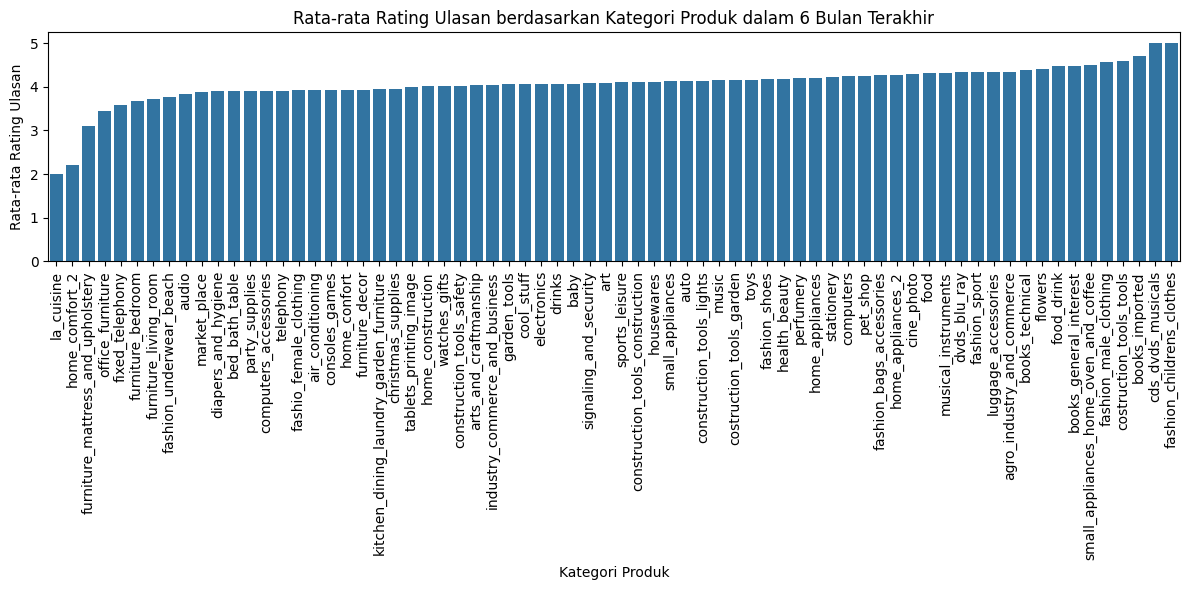

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='review_score', data=question_two_category_rating.sort_values(by='review_score'))
plt.title('Rata-rata Rating Ulasan berdasarkan Kategori Produk dalam 6 Bulan Terakhir')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-rata Rating Ulasan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualisasi waktu pengiriman untuk ulasan positif dan negatif

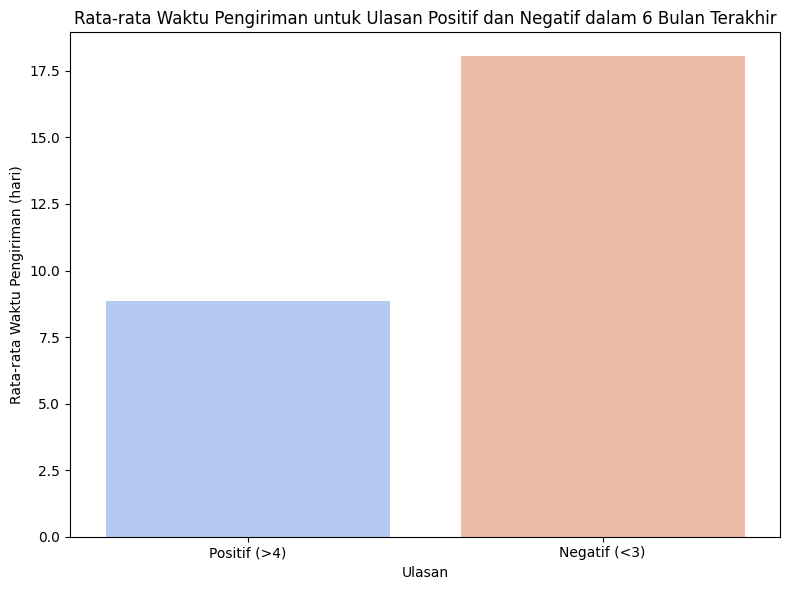

In [43]:
delivery_data = pd.DataFrame({
    'Ulasan': ['Positif (>4)', 'Negatif (<3)'],
    'Rata-rata Waktu Pengiriman (hari)': [question_two_positive_delivery, question_two_negative_delivery]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Ulasan', y='Rata-rata Waktu Pengiriman (hari)', data=delivery_data, palette='coolwarm')
plt.title('Rata-rata Waktu Pengiriman untuk Ulasan Positif dan Negatif dalam 6 Bulan Terakhir')
plt.tight_layout()
plt.show()

**Insight:**
- Dapat dilihat terdapat korelasi antara kategori produk dengan ulasan dari customer, dimana produk seperti fashion cenderung mendominasi rating lebih tinggi sedangkan produk seperti elektronik , perabotan rumah tangga hingga alat masak rumahan cenderung memiliki rating lebih rendah.
- Lama waktu pengiriman juga menjadi faktor penentu rating dari customer, yang merefleksikan kepuasan pelanggan.
- Dari visualisasi diatas dapat disimpulkan untuk komoditas / produk yang lebih besar dan berat cenderung memakan waktu lama untuk proses pengiriman, dimana perusahaan dapat mengambil langkah untuk mengoptimalkan lama pengiriman terhadap produk produk yang cenderung besar dan berat seperti perabotan , agar dapat mendapatkan kepuasan pelanggan juga pada produk tersebut.

Dari hasil analisis pada pertanyaan 2 sudah dapat menjawab pertanyaan ketiga, bahwa waktu pengiriman yang lebih cepat cenderung memberikan kepuasan pelanggan yang lebih tinggi melalui score rating yang diberikan oleh pelanggan.

## Analisis Lanjutan (Opsional)

Melakukan analisis lanjutan RFM 

In [59]:
# Merge the DataFrames
all_df = pd.merge(order_df, customer_df, on='customer_id', how='inner')
all_df = pd.merge(all_df, order_items_df, on='order_id', how='inner')
all_df = pd.merge(all_df, products_df, on='product_id', how='inner')
all_df = pd.merge(all_df, sellers_df, on='seller_id', how='inner')
all_df = pd.merge(all_df, order_payments_df, on='order_id', how='inner')
all_df = pd.merge(all_df, order_reviews_df, on='order_id', how='inner')
all_df = pd.merge(all_df, product_category_df, on='product_category_name', how='inner')

all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

rfm_df = all_df.groupby(by=["customer_id", "customer_city"], as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", 'customer_city', "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max() + datetime.timedelta(days=1)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,customer_id,customer_city,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,osasco,1,114.74,289
1,000161a058600d5901f007fab4c27140,itapecerica,1,67.41,410
2,0001fd6190edaaf884bcaf3d49edf079,nova venecia,1,195.42,548
3,0002414f95344307404f0ace7a26f1d5,mendonca,1,179.35,379
4,000379cdec625522490c315e70c7a9fb,sao paulo,1,107.01,150
...,...,...,...,...,...
94466,fffcb937e9dd47a13f05ecb8290f4d3e,sao paulo,1,91.91,166
94467,fffecc9f79fd8c764f843e9951b11341,parobe,1,81.36,154
94468,fffeda5b6d849fbd39689bb92087f431,rio de janeiro,1,63.13,100
94469,ffff42319e9b2d713724ae527742af25,taboao da serra,1,214.13,78


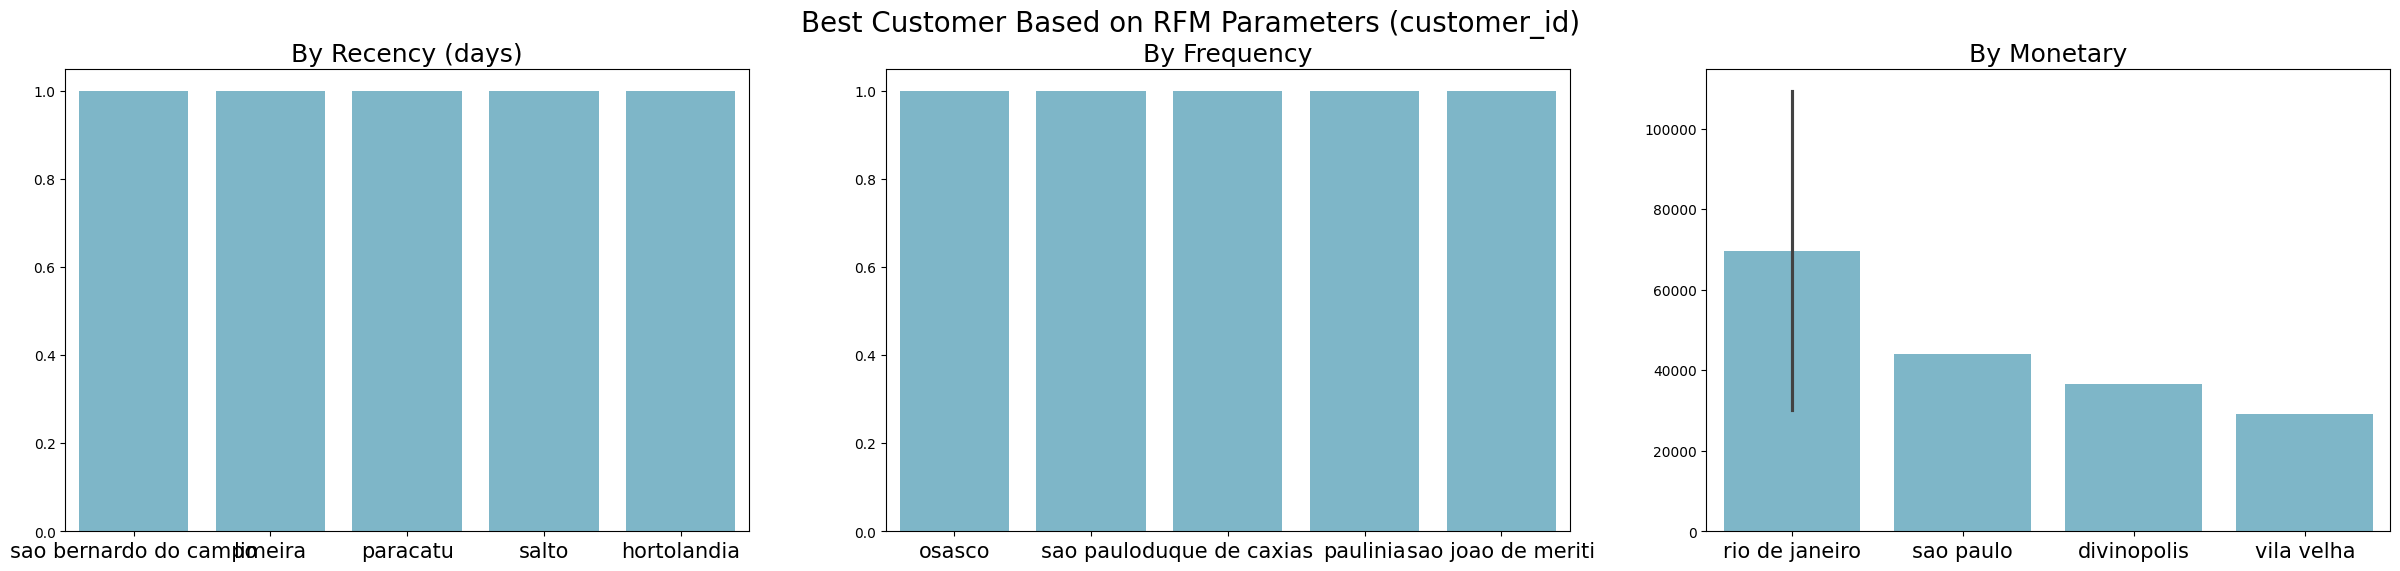

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_city", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_city", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_city", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight**
- Dapat dilihat melalui analisis RFM , pelanggan dari kota mana yang melakukan orderan terbaru akhir akhir ini berdasarkan variabel recency, sebanyak apa orderan dilakukan dan sebanyak berapa nominal uang yang dihabiskan untuk membeli barang.

## Conclusion

- Conclusion pertanyaan 1
Wilayah dan kategori produk mempengaruhi total penjualan dimana wilayah berbeda cenderung membeli barang lebih banyak dibandingkan wilayah tertentu, kategori barang yang dibeli , juga mempengaruhi revenue perusahaan , dimana kategori barang lebih mahal turut mengumbang lebih banyak revenue.

- Conclusion pertanyaan 2 dan 3
Kategori produk mempengaruhi kepuasan pelanggan terhadap produk yang dibeli , dimana juga dipengaruhi oleh lamanya waktu pengiriman, dapat disimpulkan juga bahwa barang yang cenderung besar seperti barang elektronik , peralatan dan perabotan rumah tangga, memiliki score rating kepuasan pelanggan yang lebih rendah dikarenakan waktu pengiriman yang relatif lama, sedangkan untuk barang-barang yang cenderung kecil dan mudah dikirimkan memperoleh score kepuasan pelanggan lebih tinggi dengan waktu pengiriman yang cepat, hal ini memiliki korelasi positif.